# Ensemble Testing

In [1]:
from sklearn.datasets.samples_generator import make_blobs
centers = [[-1,0], [1,0]]
X, y = make_blobs(n_samples=100, centers=centers, cluster_std = 0.4, n_features=2, random_state=0)
y = (y*2)-1

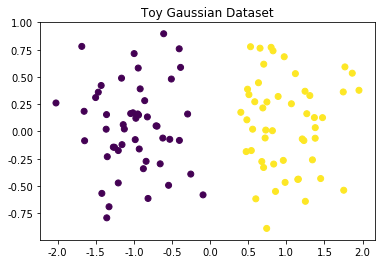

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
ax.set_autoscale_on(True)
ax.set_title('Toy Gaussian Dataset')
plt.show()

## Setup Ensemble

In [9]:
from advlearn.ensemble.poison import AttackPairs, PoisonEnsemble
from advlearn.attacks.poison import GeneralLinearAttack
from advlearn.classifier import OnlineLasso
from advlearn.defenses import KthNeighbor
from advlearn.pipeline import Pipeline

attack_pairs = AttackPairs()

# Setup Regular Lasso
lasso_classifier = OnlineLasso()
lasso_attack = GeneralLinearAttack()
attack_pairs.add(lasso_classifier, lasso_attack, 1)

# Setup Outlier Lasso
steps = [('KthNeighbor', KthNeighbor(outlier_distance_threshold=1)), 
         ('OnlineLasso', OnlineLasso())]
lasso_outlier_classifier = Pipeline(steps)
lasso_outlier_attack = GeneralLinearAttack(outlier_method='distancethreshold', outlier_distance_threshold=1)
attack_pairs.add(lasso_outlier_classifier, lasso_outlier_attack, 1)

attack_pairs.fit_all(X, y)
ensemble = PoisonEnsemble(attack_pairs, X)

In [10]:
defender = OnlineLasso()
ensemble.poison(defender)
print(ensemble.attack_pairs.get_beliefs())

ValueError: all the input arrays must have same number of dimensions